In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
## automatically reload any modules read below that might have changed (e.g. plots)
%load_ext autoreload
%autoreload 2
# importing ZI and KT tools: 
import ZItools as zit
import KTtoolsv2 as ktt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pandas as pd
data_file = 'stat_csv/PMstats_all.csv'
dAll= pd.read_csv(data_file, comment='#',sep=',',header=0) 
ra = np.array(dAll['s_ra'])
raW = np.where(ra > 180, ra-360, ra)
rMag = dAll['r'] 
d = dAll[(dAll['Nobs']>5)&(raW>-50)&(rMag>14.5)&(rMag<22.0)]

In [6]:
ra = np.array(d['s_ra'])
dec = np.array(d['s_dec']) 
raW = np.where(ra > 180, ra-360, ra)
rMag = d['r']
gi = d['gi']
pmRA = d['s_rapm']
pmDec = d['s_decpm']
GpmRA = d['g_rapm']
GpmDec = d['g_decpm']
dpmRA = GpmRA - pmRA
dpmDec = GpmDec - pmDec

Text(0, 0.5, 'dec')

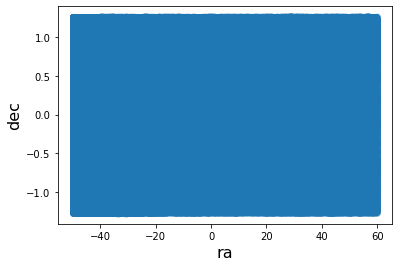

In [7]:
plt.scatter(raW, dec, alpha=0.1)
plt.xlabel('ra', fontsize=16)
plt.ylabel('dec', fontsize=16) 

(-200.0, 200.0)

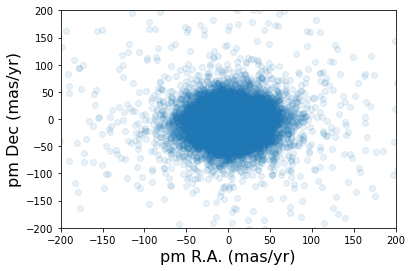

In [8]:
plt.scatter(pmRA, pmDec, alpha=0.1)
plt.xlabel('pm R.A. (mas/yr)', fontsize=16)
plt.ylabel('pm Dec (mas/yr)', fontsize=16) 
plt.xlim(-200,200)
plt.ylim(-200,200)

(0.0, 20.0)

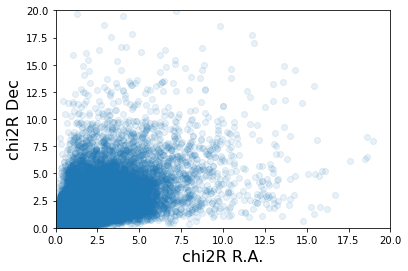

In [9]:
plt.scatter(d['chi2R_ra'], d['chi2R_dec'], alpha=0.1)
plt.xlabel('chi2R R.A.', fontsize=16)
plt.ylabel('chi2R Dec', fontsize=16) 
plt.xlim(0,20)
plt.ylim(0,20)

In [10]:
print(np.mean(d['chi2R_ra']), np.mean(d['chi2R_dec']))
print(np.mean(d['chi2_ra']), np.mean(d['chi2_dec']))
print(np.median(d['chi2_ra']), np.median(d['chi2_dec']))

1.0397731469703402 1.15594292057274
1.1833815723496326 1.3198439712685428
1.1003123027877886 1.2260860855960731


(-60.0, 60.0)

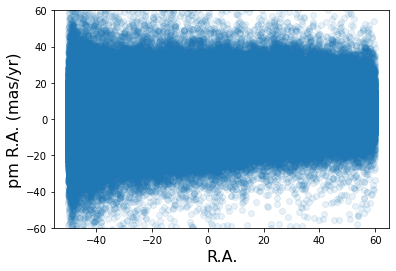

In [11]:
plt.scatter(raW, pmRA, alpha=0.1)
plt.xlabel('R.A.', fontsize=16)
plt.ylabel('pm R.A. (mas/yr)', fontsize=16) 
plt.xlim(-55,65)
plt.ylim(-60,60)

(-65.0, 65.0)

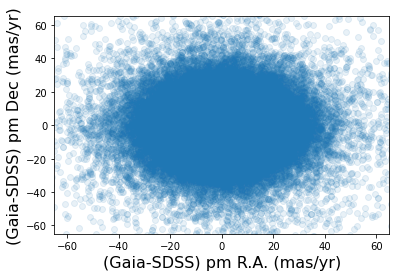

In [12]:
plt.scatter(dpmRA, dpmDec, alpha=0.1)
plt.xlabel('(Gaia-SDSS) pm R.A. (mas/yr)', fontsize=16)
plt.ylabel('(Gaia-SDSS) pm Dec (mas/yr)', fontsize=16) 
plt.xlim(-65,65)
plt.ylim(-65,65)

In [13]:
print(np.median(dpmRA), np.median(dpmDec))

0.02849744852453936 -0.1251637865736157


(-65.0, 65.0)

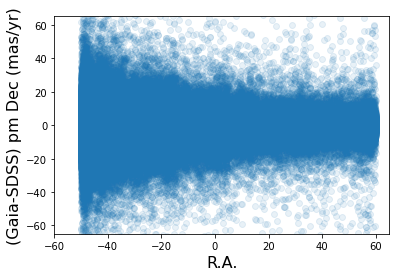

In [14]:
plt.scatter(raW, dpmDec, alpha=0.1)
plt.xlabel('R.A.', fontsize=16)
plt.ylabel('(Gaia-SDSS) pm Dec (mas/yr)', fontsize=16) 
plt.xlim(-60,65)
plt.ylim(-65,65)

(-65.0, 65.0)

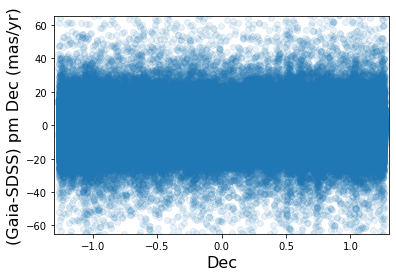

In [15]:
plt.scatter(dec, dpmDec, alpha=0.1)
plt.xlabel('Dec', fontsize=16)
plt.ylabel('(Gaia-SDSS) pm Dec (mas/yr)', fontsize=16) 
plt.xlim(-1.3,1.3)
plt.ylim(-65,65)

In [16]:
# Sgr turn-off clump (at 25 < RA < 45)
# 20.5 < r < 21.5
# 0.3 < g-i < 0.5
pmRAs = pmRA[(gi>0.3)&(gi<0.5)&(rMag>20.0)&(rMag<21.5)]
pmDecs = pmDec[(gi>0.3)&(gi<0.5)&(rMag>20.0)&(rMag<21.5)]
raWs = raW[(gi>0.3)&(gi<0.5)&(rMag>20.0)&(rMag<21.5)]

(-20.0, 20.0)

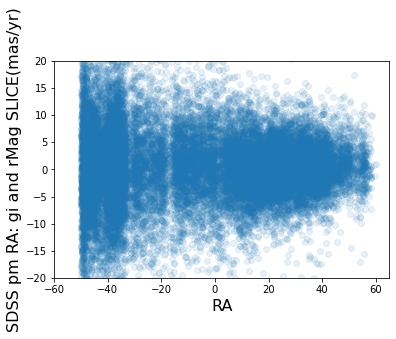

In [17]:
plt.scatter(raWs, pmRAs, alpha=0.1)
plt.xlabel('RA', fontsize=16)
plt.ylabel('SDSS pm RA: gi and rMag SLICE(mas/yr)', fontsize=16) 
plt.xlim(-60,65)
plt.ylim(-20,20)

(-20.0, 20.0)

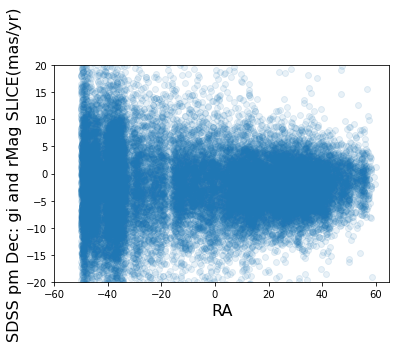

In [18]:
plt.scatter(raWs, pmDecs, alpha=0.1)
plt.xlabel('RA', fontsize=16)
plt.ylabel('SDSS pm Dec: gi and rMag SLICE(mas/yr)', fontsize=16) 
plt.xlim(-60,65)
plt.ylim(-20,20)

In [19]:
# robust standard deviation
def sigG(arr):
    return 0.741*(np.quantile(arr, 0.75)-np.quantile(arr, 0.25))

In [20]:
SGRpmRA = pmRAs[(raWs>20)&(raWs<40)]
print(np.median(SGRpmRA), sigG(np.array(SGRpmRA)), np.size(SGRpmRA))

0.36772648965843757 4.191750694306971 5266


In [21]:
SGRpmDec = pmDecs[(raWs>20)&(raWs<40)]
print(np.median(SGRpmDec), sigG(np.array(SGRpmDec)), np.size(SGRpmDec))

-2.5146371166351322 4.0799242692589734 5266


In [22]:
4.5/np.sqrt(1100)

0.13568010505999362

In [23]:
####################################
# THIS DOES THE LOG 2D HISTO
# AND CAN PLOT CONTOURS IF KW['contur'] = True
####################################
def plotdelMag2logDC_KT(d, kw):
 
    print('medianAll:', np.median(d[kw['Ystr']]), 'std.dev.All:', sigG(d[kw['Ystr']]))
    print('N=', np.size(d[kw['Ystr']]), 'min=', np.min(d[kw['Ystr']]), 'max=', np.max(d[kw['Ystr']]))

    # get binned medians and std devs
    # get med, sig, as well as x-binning
    xBinM, nPtsM, medianBinM, sigGbinM = fitMedians(d[kw['Xstr']], \
                                         d[kw['Ystr']], kw['XminBin'], kw['XmaxBin'], kw['nBinX'], 1)
    # get x-binning
    xMin,xMax,nBinX = kw['Xmin'], kw['Xmax'], kw['nBinX']
    # xEdge = np.linspace(yMin, yMax, (nBinY+1))    
    # get y-binning
    yMin,yMax,nBinY = kw['Ymin'], kw['Ymax'], kw['nBinY']
    # form the x,y edges vectors for 2d histo
    xedges = np.linspace(xMin,xMax,nBinX+1,endpoint=True,dtype=float)
    yedges = np.linspace(yMin,yMax,nBinY+1,endpoint=True,dtype=float)

    # create the 2D histo
    xvect,yvect = d[kw['Xstr']], d[kw['Ystr']]
    Histo2D, xedges, yedges = np.histogram2d(xvect,yvect, bins=(xedges, yedges))
    Histo2D = Histo2D.T
    logHisto2D = Histo2D # initial assignment
    CountMin = 0 
    # CountMin = 0  # hack for G-gi-Hess.png plot 
    pidx = Histo2D > CountMin # values > 0, can take log10
    nidx = Histo2D <= CountMin # values <= 0, cannot take log10, leave a min value
    logHisto2D[pidx] = np.log10(Histo2D[pidx])
    minval = np.min(logHisto2D[pidx]) # find the min val of transformed pix
    logHisto2D[nidx] = minval # set these pix to min val
      
    # plotting
    # get the colormap from kw
    cmap = kw['cmap']
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.subplots_adjust(
        # the left side of the subplots of the figure
        left=0.15,  
        # the right side of the subplots of the figure
        right=1.0,
        # the bottom of the subplots of the figure
        bottom=0.1,
        # the top of the subplots of the figure
        top=0.95,
        # the amount of width reserved for space between subplots,
        # expressed as a fraction of the average axis width
        wspace=0.15,   
        # the amount of height reserved for space between subplots,
        # expressed as a fraction of the average axis height
        hspace=0.55)   

    # ax.scatter(d[kw['Xstr']], d[kw['Ystr']], s=kw['symbSize'], c='black') 
    X, Y = np.meshgrid(xedges, yedges)
    # cs = ax.pcolormesh(X,Y, Histo2D, cmap='Greys')
    cs = ax.pcolormesh(X,Y, logHisto2D, cmap=cmap)
    # fig.colorbar(cs,location='top')
    cbar = fig.colorbar(cs, spacing='proportional',
                        shrink=0.95, ax=ax)
    cbar.set_label(label='Counts [dex]',size=20)
    cbar_tix_font = 16 # Adjust as appropriate.
    cbar.ax.tick_params(labelsize=cbar_tix_font)
    
    # plot contours if kw['contur'] = True
    if kw['contur']:
        # check if contour levels have been set
        # else use from color bar
        cbar_tix = cbar.get_ticks()
        cbar_tix = cbar_tix[1:] # skip the min level for clarity
        if kw.get('cbar_tix'): # if kw set, then use that value
            cbar_tix = kw['cbar_tix']
        # cbar.location('top')
        CS = plt.contour(X[1:,1:],Y[1:,1:],logHisto2D,cbar_tix,
                    colors='brown',linestyles='dashdot')
        # ax.clabel(CS, CS.levels, inline=True, fmt='%d', fontsize=20,colors='black')
    
    if False:
        # special case for G-r vs. g-i diagram 
        import ZItools as zit
        thetaB = np.array([-0.0307, -0.0885,  0.6632, -1.0179,  0.7262,  -0.2547,  0.0337])
        thetaR = np.array([ 9.6488, -8.4115, -7.9834, 13.757 , -7.0973, 1.5993, -0.1351])    
        xfit2 = np.linspace(0.0, 3.5, 1000)
        yfitB = zit.polynomial_fit(thetaB, xfit2) 
        yfitR = zit.polynomial_fit(thetaR, xfit2) 
        yfit2 = np.where(xfit2 < 2.0, yfitB, yfitR)
        ax.plot(xfit2, yfit2, c='green', linewidth=2, linestyle='solid')


    ## Rearrange the plotting order in order to make the lines stand out
    #
    rmsBin = np.sqrt(nPtsM) / np.sqrt(np.pi/2) * sigGbinM
    rmsP = medianBinM + rmsBin
    rmsM = medianBinM - rmsBin
    ax.plot(xBinM, rmsP, c='black', linewidth=2, linestyle='dotted')
    ax.plot(xBinM, rmsM, c='black', linewidth=2, linestyle='dotted')
    #
    TwoSigP = medianBinM + kw['Nsigma']*sigGbinM
    TwoSigM = medianBinM - kw['Nsigma']*sigGbinM 
    ax.plot(xBinM, TwoSigP, c='black', linewidth=3, linestyle='dashed')
    ax.plot(xBinM, TwoSigM, c='black', linewidth=3, linestyle='dashed')
    # 
    if (kw['offset'] >= 0):
        offsetColor0 = 'green'
        offsetColor1 = 'red'
        xL = np.linspace(kw['XminBin'], kw['XmaxBin'])
        ax.plot(xL, 0*xL, '-', c=offsetColor0, linewidth=2)
        #ax.plot(xL, 0*xL+kw['offset'], '--', c=offsetColor1, linewidth=1)
        #ax.plot(xL, 0*xL-kw['offset'], '--', c=offsetColor1, linewidth=1)
    if (1):
        ax.scatter(xBinM, medianBinM, s=30.0, c='black', alpha=0.8)
        ax.scatter(xBinM, medianBinM, s=15.0, c='yellow', alpha=0.3)
    #
    ax.set_xlabel(kw['Xlabel'], fontsize=22)
    ax.set_ylabel(kw['Ylabel'], fontsize=22)
    ax.set_xlim(kw['Xmin'], kw['Xmax'])
    ax.set_ylim(kw['Ymin'], kw['Ymax'])
    # ax.set_ylim(kw['Ymax'], kw['Ymin'])   # hack for G-gi-Hess.png plot 
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.savefig(kw['plotName'], dpi=600)
    print('saved plot as:', kw['plotName']) 
    plt.show()
    return

################################
# given vectors x and y, fit medians in bins from xMin to xMax, with Nbin steps,
# and return xBin, medianBin, medianErrBin 
def fitMedians(x, y, xMin, xMax, Nbin, verbose=1): 

    # first generate bins
    xEdge = np.linspace(xMin, xMax, (Nbin+1)) 
    xBin = np.linspace(0, 1, Nbin)
    nPts = 0*np.linspace(0, 1, Nbin)
    medianBin = 0*np.linspace(0, 1, Nbin)
    sigGbin = -1+0*np.linspace(0, 1, Nbin) 
    for i in range(0, Nbin): 
        xBin[i] = 0.5*(xEdge[i]+xEdge[i+1]) 
        yAux = y[(x>xEdge[i])&(x<=xEdge[i+1])]
        if (yAux.size > 0):
            nPts[i] = yAux.size
            medianBin[i] = np.median(yAux)
            # robust estimate of standard deviation: 0.741*(q75-q25)
            sigmaG = 0.741*(np.percentile(yAux,75)-np.percentile(yAux,25))
            # uncertainty of the median: sqrt(pi/2)*st.dev/sqrt(N)
            sigGbin[i] = np.sqrt(np.pi/2)*sigmaG/np.sqrt(nPts[i])
        else:
            nPts[i] = 0
            medianBin[i] = 0
            sigGbin[i] = 0
        
    if (verbose):
        print('median:', np.median(medianBin[nPts>0]), 'std.dev:', np.std(medianBin[nPts>0]))

    return xBin, nPts, medianBin, sigGbin


medianAll: 19.156220689655168 std.dev.All: 1.7952222255882346
N= 1047599 min= 14.50291666666667 max= 20.991457142857143
median: nan std.dev: nan
saved plot as: r-gi-Hess.png


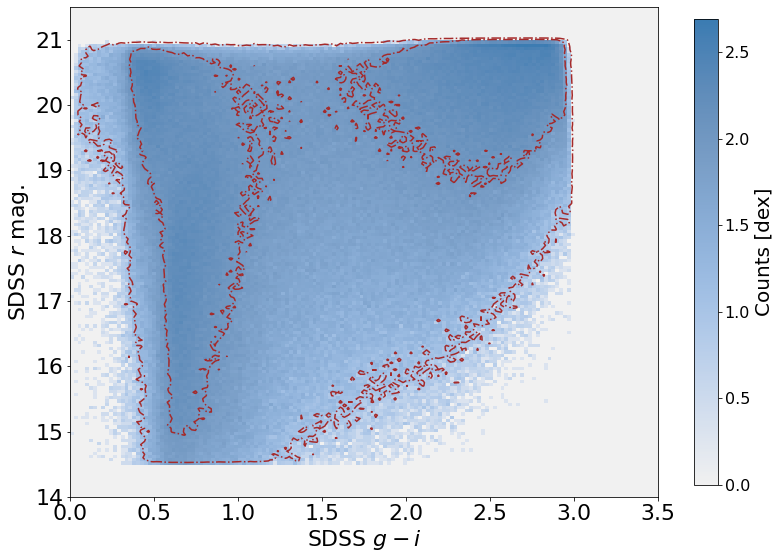

In [24]:
kw = {"Xstr":'gi', "Xmin":0.0, "Xmax":3.5, "Xlabel":'SDSS $g-i$', \
      "nBinX":150, "nBinY":150, "cmap":'cet_CET_L12', "contur":True, \
      "XminBin":4.1, "XmaxBin":4.4, "XminBfit":0.05, "XmaxBfit":4.45, "nBin":90, \
      "Nsigma":0, "offset":-2.0, "symbSize":0.05}
#  
kw["Ystr"] = 'r'
kw["Ylabel"] = 'SDSS $r$ mag.' 
kw["plotName"] = 'r-gi-Hess.png' 
kw["Ymin"] = 14.0
kw["Ymax"] = 21.5
kw['cbar_tix'] = [1., 2]
plotdelMag2logDC_KT(d, kw) 

In [25]:
dS = d[(raW>25)&(raW<40)]

medianAll: 19.21702669632925 std.dev.All: 1.8897369867187497
N= 75944 min= 14.505255555555555 max= 20.98808333333333
median: nan std.dev: nan
saved plot as: r-gi-Hess.png


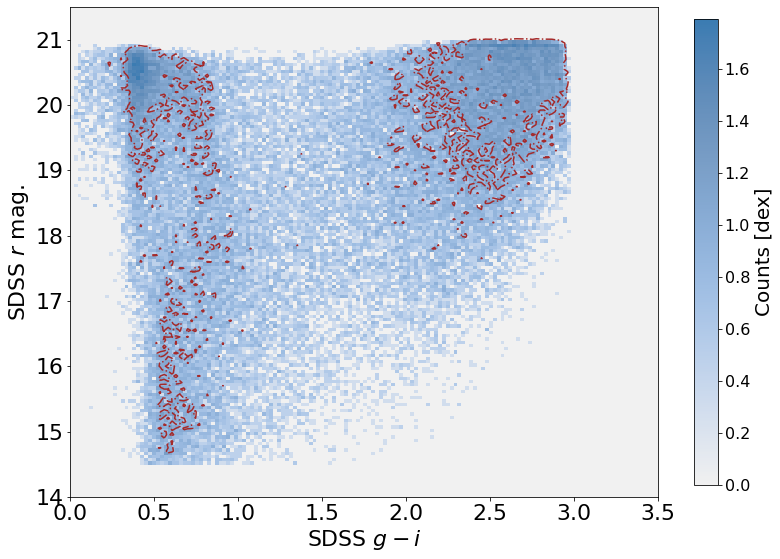

In [26]:
plotdelMag2logDC_KT(dS, kw) 

(-65.0, 65.0)

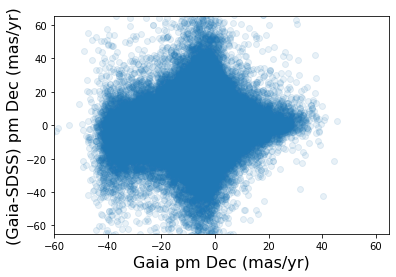

In [27]:
plt.scatter(GpmDec, dpmDec, alpha=0.1)
plt.xlabel('Gaia pm Dec (mas/yr)', fontsize=16)
plt.ylabel('(Gaia-SDSS) pm Dec (mas/yr)', fontsize=16) 
plt.xlim(-60,65)
plt.ylim(-65,65)

medianAll: 0.02849744852453936 std.dev.All: 4.241224426417548
N= 1047599 min= -3044.4646231313486 max= 4045.316649996567
median: 0.003137445199218103 std.dev: 2.181446688198511
saved plot as: dpmRA-Hess.png


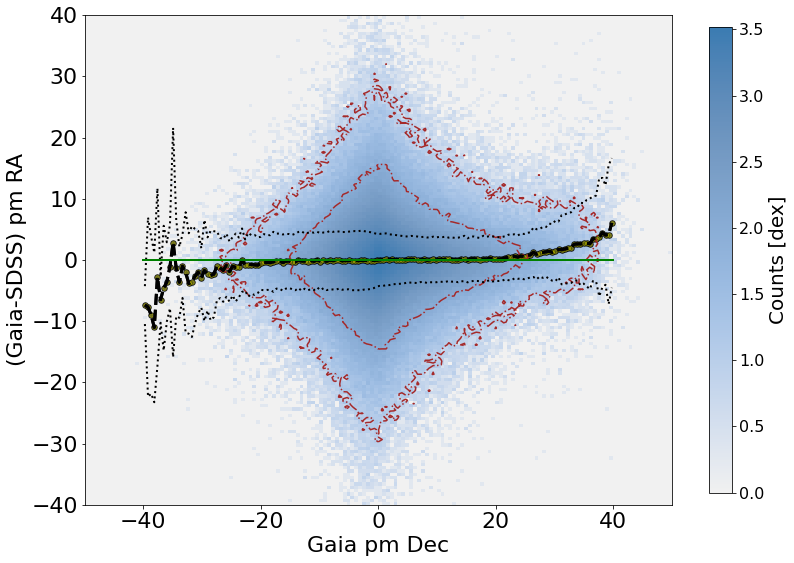

In [28]:
d['dpmRA'] = dpmRA
kw = {"Xstr":'g_rapm', "Xmin":-50.0, "Xmax":50.0, "Xlabel":'Gaia pm Dec', \
      "nBinX":150, "nBinY":150, "cmap":'cet_CET_L12', "contur":True, \
      "XminBin":-40, "XmaxBin":40, "XminBfit":0.05, "XmaxBfit":4.45, "nBin":90, \
      "Nsigma":0, "offset":0.0, "symbSize":0.05}
#  
kw["Ystr"] = 'dpmRA'
kw["Ylabel"] = '(Gaia-SDSS) pm RA' 
kw["plotName"] = 'dpmRA-Hess.png' 
kw["Ymin"] = -40.0
kw["Ymax"] =  40.0
kw['cbar_tix'] = [1., 2]
plotdelMag2logDC_KT(d, kw) 

medianAll: -0.1251637865736157 std.dev.All: 4.491065695726894
N= 1047599 min= -2956.3812442937838 max= 1504.254652659119
median: -0.11972568322653254 std.dev: 2.6342994809665266
saved plot as: dpmDec-Hess.png


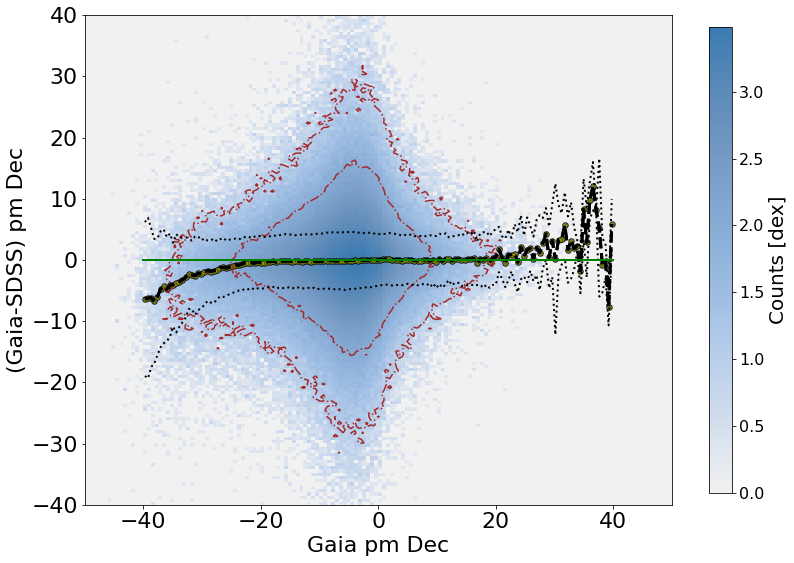

In [29]:
d['dpmDec'] = dpmDec
kw = {"Xstr":'g_decpm', "Xmin":-50.0, "Xmax":50.0, "Xlabel":'Gaia pm Dec', \
      "nBinX":150, "nBinY":150, "cmap":'cet_CET_L12', "contur":True, \
      "XminBin":-40, "XmaxBin":40, "XminBfit":0.05, "XmaxBfit":4.45, "nBin":90, \
      "Nsigma":0, "offset":0.0, "symbSize":0.05}
#  
kw["Ystr"] = 'dpmDec'
kw["Ylabel"] = '(Gaia-SDSS) pm Dec' 
kw["plotName"] = 'dpmDec-Hess.png' 
kw["Ymin"] = -40.0
kw["Ymax"] =  40.0
kw['cbar_tix'] = [1., 2]
plotdelMag2logDC_KT(d, kw) 

medianAll: -0.035729321171514165 std.dev.All: 1.2117702178718757
N= 1047599 min= -35.6387370708723 max= 22.61810540571989
median: -0.035655722371872825 std.dev: 0.43289752461993675
saved plot as: dpmDecCHI-Hess.png


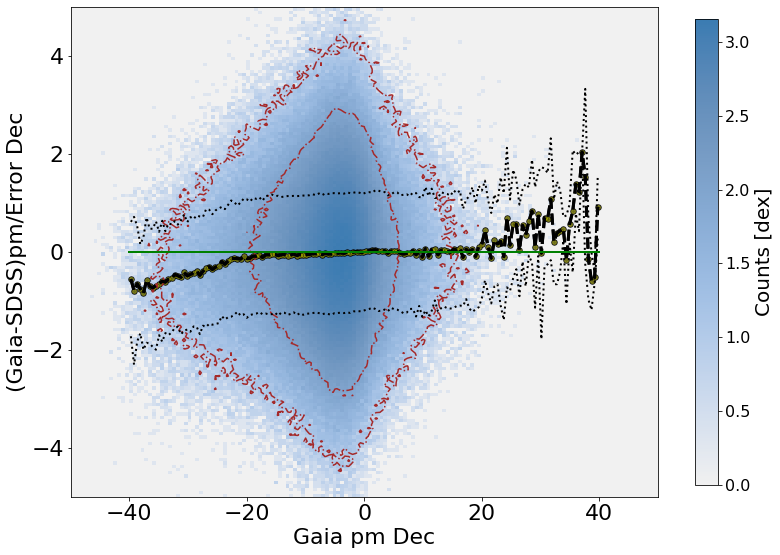

In [30]:
d['dpmDecCHI'] = dpmDec / d['s_decpmerr']
kw = {"Xstr":'g_decpm', "Xmin":-50.0, "Xmax":50.0, "Xlabel":'Gaia pm Dec', \
      "nBinX":150, "nBinY":150, "cmap":'cet_CET_L12', "contur":True, \
      "XminBin":-40, "XmaxBin":40, "XminBfit":0.05, "XmaxBfit":4.45, "nBin":90, \
      "Nsigma":0, "offset":0.0, "symbSize":0.05}
#  
kw["Ystr"] = 'dpmDecCHI'
kw["Ylabel"] = '(Gaia-SDSS)pm/Error Dec' 
kw["plotName"] = 'dpmDecCHI-Hess.png' 
kw["Ymin"] = -5.0
kw["Ymax"] =  5.0
kw['cbar_tix'] = [1., 2]
plotdelMag2logDC_KT(d, kw) 

In [31]:
v1 = dpmDec[(GpmDec>-40)&(GpmDec<-30)]
v2 = dpmDec[(GpmDec>-8)&(GpmDec<-3)]

In [32]:
print(sigG(v1), sigG(v2))

7.182094984232179 4.648680468040265


medianAll: -2.343754266722401 std.dev.All: 5.7672223711284785
N= 24242 min= -616.001878167697 max= 298.27344984436286
median: -2.349026949682724 std.dev: 0.8212422834100767
saved plot as: SGRpmDec-Hess.png


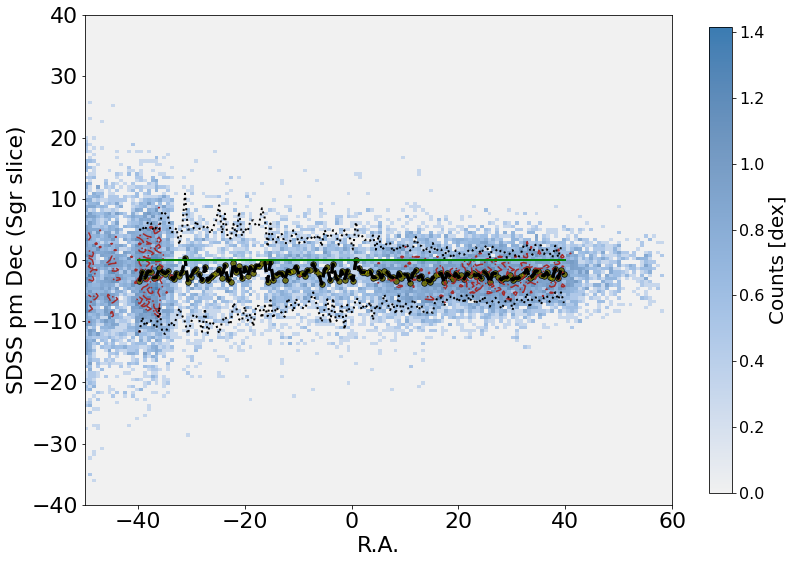

In [33]:
ds2 = d[(d['gi']>0.3)&(d['gi']<0.5)&(d['r']>20.0)&(d['r']<21.5)]
ds2['raWs'] = raWs
ds2['pmDecs'] = pmDecs 
kw = {"Xstr":'raWs', "Xmin":-50.0, "Xmax":60.0, "Xlabel":'R.A.', \
      "nBinX":150, "nBinY":150, "cmap":'cet_CET_L12', "contur":True, \
      "XminBin":-40, "XmaxBin":40, "XminBfit":0.05, "XmaxBfit":4.45, "nBin":90, \
      "Nsigma":0, "offset":0.0, "symbSize":0.05}
#  
kw["Ystr"] = 'pmDecs'
kw["Ylabel"] = 'SDSS pm Dec (Sgr slice)' 
kw["plotName"] = 'SGRpmDec-Hess.png' 
kw["Ymin"] = -40.0
kw["Ymax"] =  40.0
kw['cbar_tix'] = [1., 2]
plotdelMag2logDC_KT(ds2, kw) 


medianAll: 0.4150396794355715 std.dev.All: 5.9186565977014896
N= 24242 min= -712.1642901233971 max= 253.6702430584937
median: 0.48880650971860895 std.dev: 0.7409165148055835
saved plot as: SGRpmRA-Hess.png


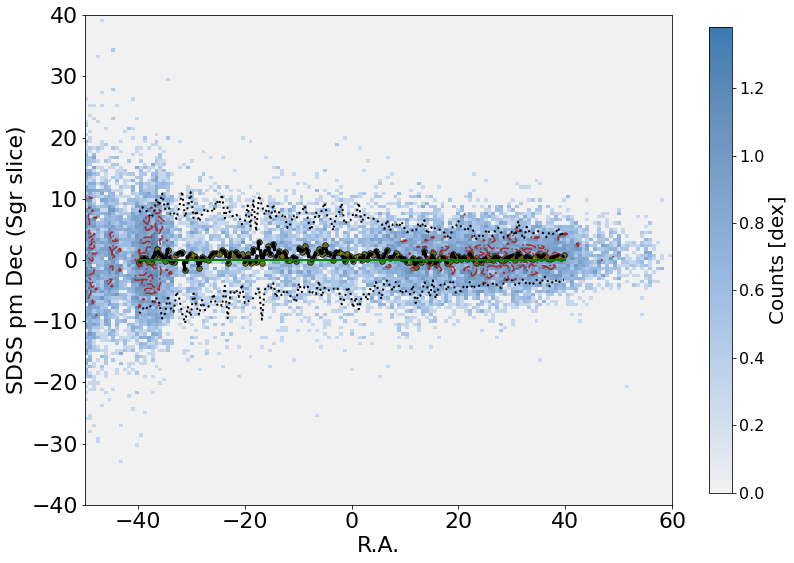

In [34]:
ds2['pmRAs'] = pmRAs 
kw = {"Xstr":'raWs', "Xmin":-50.0, "Xmax":60.0, "Xlabel":'R.A.', \
      "nBinX":150, "nBinY":150, "cmap":'cet_CET_L12', "contur":True, \
      "XminBin":-40, "XmaxBin":40, "XminBfit":0.05, "XmaxBfit":4.45, "nBin":90, \
      "Nsigma":0, "offset":0.0, "symbSize":0.05}
#  
kw["Ystr"] = 'pmRAs'
kw["Ylabel"] = 'SDSS pm Dec (Sgr slice)' 
kw["plotName"] = 'SGRpmRA-Hess.png' 
kw["Ymin"] = -40.0
kw["Ymax"] =  40.0
kw['cbar_tix'] = [1., 2]
plotdelMag2logDC_KT(ds2, kw) 


In [35]:
### step in RA by 10 deg (perhaps 5 deg?) and make Hess plots
### in the r vs. g-i color-magnitude diagram, color-coded by
### a) counts
### b) median for g_rapm-s_rapm
### c) median for g_decpm-s_decpm
### d) median dpm = sqrt((g_rapm-s_rapm)**2 + (g_decpm-s_decpm)**2)
### e) median chi2R for RA pm (from SDSS)
### f) median chi2R for Dec pm (from SDSS)
### g) median and sigG for RA pm (from SDSS)
### h) median and sigG for Dec pm (from SDSS) 
### i.e. similar to fig. 23 in http://faculty.washington.edu/ivezic/Publications/apj_708_1_717.pdf
### Also try the same as above but for r vs. RA plot (as in fig. 24)